In [ ]:
!pip install pydrive
!pip install scikit-learn==0.20.0
!pip show scikit-learn # to see which version and where scikit-learn is installed
!pip freeze # to see all packages installed in the active virtualenv
"import sklearn; sklearn.show_versions()"

Name: scikit-learn
Version: 0.20.0
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /usr/local/lib/python3.6/dist-packages
Requires: scipy, numpy
Required-by: yellowbrick, umap-learn, textgenrnn, sklearn, sklearn-pandas, mlxtend, lucid, lightgbm, librosa, imbalanced-learn, fancyimpute
absl-py==0.10.0
alabaster==0.7.12
albumentations==0.1.12
altair==4.1.0
argon2-cffi==20.1.0
asgiref==3.2.10
astor==0.8.1
astropy==4.0.1.post1
astunparse==1.6.3
async-generator==1.10
atari-py==0.2.6
atomicwrites==1.4.0
attrs==20.2.0
audioread==2.1.8
autograd==1.3
Babel==2.8.0
backcall==0.2.0
beautifulsoup4==4.6.3
bleach==3.1.5
blis==0.4.1
bokeh==2.1.1
boto==2.49.0
boto3==1.14.59
botocore==1.17.59
Bottleneck==1.3.2
branca==0.4.1
bs4==0.0.1
CacheControl==0.12.6
cachetools==4.1.1
catalogue==1.0.0
certifi==2020.6.20
cffi==1.14.2
chainer==7.4.0
chardet==3.0.4
click==7.1.2
cloudpickle==1.3.0
cmake==3

'import sklearn; sklearn.show_versions()'

In [ ]:
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,Dropout,BatchNormalization #這行milk02.ipynb
from keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error  #02.ipynb

import pandas as pd
from pydrive.auth import GoogleAuth #雲端部分#載入資料用
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

#把要one hot的類別轉換成數字                           #從這以下milk02.ipynb
from sklearn.preprocessing import LabelEncoder

#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from keras import backend as K
from keras.optimizers import Adam

from sklearn.model_selection import KFold

In [ ]:
##載入new_train
auth.authenticate_user()                  
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1UVrXxh_IShqA5apl_YfdstyUsFyhoqxb'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('NEW_Train_0917.csv')
new_train = pd.read_csv('NEW_Train_0917.csv', sep=',')
new_train

,firm,CowID,MomID,BabyNum,FeedDay,Milk,Age,BreedNum,T Max,RH,THI,disease,Sampling D Month,preMilk
0,2,728,162,1,55,20.0,30,2,27.826169,78.502478,22.850519,1.0,2,18.486790
1,2,736,148,2,62,43.0,38,1,34.900000,79.000000,27.093337,0.0,1,50.028788
2,2,781,1099,1,11,24.0,27,0,23.800000,93.000000,21.498437,0.0,0,23.542750
3,1,388,407,2,290,18.2,57,7,15.700000,91.000000,12.100133,0.0,1,16.227874
4,2,189,943,2,156,10.0,55,1,20.200000,95.000000,17.597478,0.0,3,4.225900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26450,2,495,1060,3,137,33.0,60,1,31.900000,83.000000,27.146230,0.0,1,34.873643
26451,2,1312,1121,1,216,24.0,33,1,27.900000,91.000000,24.074355,0.0,0,23.502263
26452,2,149,704,1,37,20.4,26,0,16.200000,74.000000,13.401030,0.0,3,18.927031
26453,1,255,763,1,73,19.0,34,0,34.100000,69.000000,26.279941,0.0,2,17.265703


In [ ]:
##載入new_test
auth.authenticate_user()                  
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1B4iX6iz9Q-WtvBhMne4AN7g_hFbbsENo'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('NEW_Test_0917.csv')
new_test = pd.read_csv('NEW_Test_0917.csv', sep=',')
#print(new_test.loc[[48]])
new_test

,firm,CowID,MomID,BabyNum,FeedDay,Milk,Age,BreedNum,T Max,RH,THI,disease,Sampling D Month,preMilk
0,2,96,983,3,183,40.0,70,2,25.5,85.0,20.236278,0.0,3,43.519725
1,2,494,976,3,71,28.0,50,0,35.2,82.0,23.383510,0.0,2,28.497401
2,3,1816,664,1,365,12.0,38,5,30.4,77.0,24.245300,0.0,2,8.522834
3,2,76,996,4,177,35.0,73,1,29.1,81.0,23.221440,0.0,1,37.392398
4,1,250,762,1,42,28.8,28,0,11.1,71.0,10.980262,0.0,3,29.436534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6678,2,280,1071,3,18,39.0,42,0,34.9,82.0,29.323086,0.0,2,42.210640
6679,2,1789,1122,2,508,10.0,52,4,34.8,72.0,28.814617,0.0,2,3.773601
6680,2,1554,1122,3,158,30.6,62,1,34.4,75.0,27.200232,0.0,1,31.852630
6681,2,466,715,1,9,20.0,22,0,19.5,80.0,16.578618,1.0,3,18.585823


In [ ]:
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
file_id = '1TgijKpsq6haP2C6yHsA7_bVtf5Ra6Cps'  #雲端硬碟檔案連結碼
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('spec01.csv')
spec = pd.read_csv('spec01.csv',sep=',')
#print(spec)

In [ ]:
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str("A")):
          spec['7'][i]=1
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str('B')):
          spec['7'][i]=2
for i in range(len(spec['7'])):
    if(str(spec['7'][i])==str('C')):
          spec['7'][i]=3
#spec

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [ ]:
#測試spec
#spec.loc[[4290]]

In [ ]:
new_train['Milk']

0        20.0
1        43.0
2        24.0
3        18.2
4        10.0
         ... 
26450    33.0
26451    24.0
26452    20.4
26453    19.0
26454    25.5
Name: Milk, Length: 26455, dtype: float64

In [ ]:
y_fortest=new_test['Milk']
y_fortest

0       40.0
1       28.0
2       12.0
3       35.0
4       28.8
        ... 
6678    39.0
6679    10.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 6683, dtype: float64

In [ ]:
y=new_train['Milk']
y

0        20.0
1        43.0
2        24.0
3        18.2
4        10.0
         ... 
26450    33.0
26451    24.0
26452    20.4
26453    19.0
26454    25.5
Name: Milk, Length: 26455, dtype: float64

In [ ]:
new_train_backup = new_train
new_test_backup = new_test

In [ ]:
#挑選靠賽要訓練的資料
new_train=pd.DataFrame(data=new_train_backup,columns=['firm','CowID','BabyNum','preMilk','FeedDay','Age','BreedNum','T Max','THI','Sampling D Month'])
new_train

,firm,CowID,BabyNum,preMilk,FeedDay,Age,BreedNum,T Max,THI,Sampling D Month
0,2,728,1,18.486790,55,30,2,27.826169,22.850519,2
1,2,736,2,50.028788,62,38,1,34.900000,27.093337,1
2,2,781,1,23.542750,11,27,0,23.800000,21.498437,0
3,1,388,2,16.227874,290,57,7,15.700000,12.100133,1
4,2,189,2,4.225900,156,55,1,20.200000,17.597478,3
...,...,...,...,...,...,...,...,...,...,...
26450,2,495,3,34.873643,137,60,1,31.900000,27.146230,1
26451,2,1312,1,23.502263,216,33,1,27.900000,24.074355,0
26452,2,149,1,18.927031,37,26,0,16.200000,13.401030,3
26453,1,255,1,17.265703,73,34,0,34.100000,26.279941,2


In [ ]:
new_test=pd.DataFrame(data=new_test_backup,columns=['firm','CowID','BabyNum','preMilk','FeedDay','Age','BreedNum','T Max','THI','Sampling D Month'])
new_test

,firm,CowID,BabyNum,preMilk,FeedDay,Age,BreedNum,T Max,THI,Sampling D Month
0,2,96,3,43.519725,183,70,2,25.5,20.236278,3
1,2,494,3,28.497401,71,50,0,35.2,23.383510,2
2,3,1816,1,8.522834,365,38,5,30.4,24.245300,2
3,2,76,4,37.392398,177,73,1,29.1,23.221440,1
4,1,250,1,29.436534,42,28,0,11.1,10.980262,3
...,...,...,...,...,...,...,...,...,...,...
6678,2,280,3,42.210640,18,42,0,34.9,29.323086,2
6679,2,1789,2,3.773601,508,52,4,34.8,28.814617,2
6680,2,1554,3,31.852630,158,62,1,34.4,27.200232,1
6681,2,466,1,18.585823,9,22,0,19.5,16.578618,3


In [ ]:
#把要one hot的類別轉換成數字
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
all_data=pd.concat([new_train,new_test])
#all_data['3'] = labelencoder.fit_transform(all_data['3'])
all_data['CowID'] = labelencoder.fit_transform(all_data['CowID'])
#all_data['MomID'] = labelencoder.fit_transform(all_data['MomID'])
#all_data['DadID'] = labelencoder.fit_transform(all_data['DadID'])
all_data['Sampling D Month'] = labelencoder.fit_transform(all_data['Sampling D Month'])
new_train = all_data[0:len(new_train)]
new_test = all_data[len(new_train)::]
all_data=pd.concat([new_train,new_test])


In [ ]:
all_data

,firm,CowID,BabyNum,preMilk,FeedDay,Age,BreedNum,T Max,THI,Sampling D Month
0,2,728,1,18.486790,55,30,2,27.826169,22.850519,2
1,2,736,2,50.028788,62,38,1,34.900000,27.093337,1
2,2,781,1,23.542750,11,27,0,23.800000,21.498437,0
3,1,388,2,16.227874,290,57,7,15.700000,12.100133,1
4,2,189,2,4.225900,156,55,1,20.200000,17.597478,3
...,...,...,...,...,...,...,...,...,...,...
6678,2,280,3,42.210640,18,42,0,34.900000,29.323086,2
6679,2,1789,2,3.773601,508,52,4,34.800000,28.814617,2
6680,2,1554,3,31.852630,158,62,1,34.400000,27.200232,1
6681,2,466,1,18.585823,9,22,0,19.500000,16.578618,3


In [ ]:
#把要的類別轉換成one hot
import numpy as np
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(categorical_features =[0,1,2,6,9])#6
enc.fit(all_data)
X=enc.transform(new_train).toarray()
X_test=enc.transform(new_test).toarray()
X.shape

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:363: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:385: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(26455, 1856)

In [ ]:
X_test.shape

(6683, 1856)

In [ ]:
new_test

,firm,CowID,BabyNum,preMilk,FeedDay,Age,BreedNum,T Max,THI,Sampling D Month
0,2,96,3,43.519725,183,70,2,25.5,20.236278,3
1,2,494,3,28.497401,71,50,0,35.2,23.383510,2
2,3,1816,1,8.522834,365,38,5,30.4,24.245300,2
3,2,76,4,37.392398,177,73,1,29.1,23.221440,1
4,1,250,1,29.436534,42,28,0,11.1,10.980262,3
...,...,...,...,...,...,...,...,...,...,...
6678,2,280,3,42.210640,18,42,0,34.9,29.323086,2
6679,2,1789,2,3.773601,508,52,4,34.8,28.814617,2
6680,2,1554,3,31.852630,158,62,1,34.4,27.200232,1
6681,2,466,1,18.585823,9,22,0,19.5,16.578618,3


In [ ]:
X

array([[ 0.        ,  1.        ,  0.        , ..., 30.        ,
        27.82616918, 22.85051932],
       [ 0.        ,  1.        ,  0.        , ..., 38.        ,
        34.9       , 27.09333711],
       [ 0.        ,  1.        ,  0.        , ..., 27.        ,
        23.8       , 21.4984371 ],
       ...,
       [ 0.        ,  1.        ,  0.        , ..., 26.        ,
        16.2       , 13.40103018],
       [ 1.        ,  0.        ,  0.        , ..., 34.        ,
        34.1       , 26.27994148],
       [ 1.        ,  0.        ,  0.        , ..., 70.        ,
        33.8       , 26.86139404]])

In [ ]:
#X=X.values
X = X.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
y=y.values

In [ ]:
X

array([[0.        , 1.        , 0.        , ..., 0.18867923, 0.61618984,
        0.6523535 ],
       [0.        , 1.        , 0.        , ..., 0.2389937 , 0.8338462 ,
        0.82666194],
       [0.        , 1.        , 0.        , ..., 0.16981131, 0.49230766,
        0.5968058 ],
       ...,
       [0.        , 1.        , 0.        , ..., 0.163522  , 0.25846156,
        0.26413873],
       [1.        , 0.        , 0.        , ..., 0.21383648, 0.8092307 ,
        0.7932451 ],
       [1.        , 0.        , 0.        , ..., 0.44025156, 0.79999995,
        0.81713307]], dtype=float32)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
#random_state為02.ipynb

In [ ]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (23809, 1856)
Please show me the shape of x_test: (2646, 1856)
Please show me the shape of y_train: (23809,)
Please show me the shape of y_test: (2646,)


In [ ]:
from keras import backend as K
def rmse(y_pred, y_true):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [ ]:
from sklearn.model_selection import KFold
from keras import regularizers
from matplotlib import pyplot
from keras import optimizers
import keras
from keras.callbacks import ReduceLROnPlateau
count=1
trainacc=0
testacc=0
keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=None)
print("y_test:") #看每次y_test一不一樣
print(y_test)

y_test:
[14.  31.  41.4 ... 29.  26.  19. ]


In [ ]:
print("y_train:") #看每次y_train一不一樣
print(y_train)

y_train:
[35.  19.  30.  ... 32.2 24.6 50. ]


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],1,x_train.shape[1]))#做成三維
x_test = np.reshape(x_test,(x_test.shape[0],1,x_test.shape[1]))

In [ ]:
print("Please show me the shape of x_train:",x_train.shape)
print("Please show me the shape of x_test:",x_test.shape)
print("Please show me the shape of y_train:",y_train.shape)
print("Please show me the shape of y_test:",y_test.shape)

Please show me the shape of x_train: (23809, 1, 1856)
Please show me the shape of x_test: (2646, 1, 1856)
Please show me the shape of y_train: (23809,)
Please show me the shape of y_test: (2646,)


In [ ]:
from keras.layers import Embedding, Bidirectional,TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers import Activation, Dense
from keras.callbacks import EarlyStopping
model = Sequential()#LSTM
model.add(LSTM(64, input_shape=(1,x_train.shape[2])))
model.add(Dropout(0.5))

model.add(Dense(1))
ADAM=keras.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss=rmse, optimizer=ADAM,metrics=[rmse])
early_stopping=EarlyStopping(monitor='val_loss', patience=10)
#reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)
history=model.fit(x_train, y_train, epochs=500,validation_data=(x_test, y_test), batch_size=5, verbose=2, callbacks=[early_stopping],shuffle=True)#epochs要改回1000

Predicts = model.predict(x_train)#TrainRMSE
testScore = math.sqrt(mean_squared_error(y_train, Predicts))
print('Train Score: %.2f RMSE' % (testScore))
    

Predict = model.predict(x_test)#TestRMSE
testScore = math.sqrt(mean_squared_error(y_test, Predict))
print('Validation Score: %.2f RMSE' % (testScore))
print(Predict)


Epoch 1/500
4762/4762 - 16s - loss: 6.9624 - rmse: 6.9622 - val_loss: 1.7328 - val_rmse: 1.7306
Epoch 2/500
4762/4762 - 16s - loss: 3.1678 - rmse: 3.1679 - val_loss: 1.2979 - val_rmse: 1.2971
Epoch 3/500
4762/4762 - 16s - loss: 2.9984 - rmse: 2.9984 - val_loss: 1.0886 - val_rmse: 1.0871
Epoch 4/500
4762/4762 - 15s - loss: 2.8993 - rmse: 2.8992 - val_loss: 0.9412 - val_rmse: 0.9400
Epoch 5/500
4762/4762 - 15s - loss: 2.8064 - rmse: 2.8065 - val_loss: 0.8698 - val_rmse: 0.8687
Epoch 6/500
4762/4762 - 15s - loss: 2.7360 - rmse: 2.7360 - val_loss: 0.8006 - val_rmse: 0.7997
Epoch 7/500
4762/4762 - 16s - loss: 2.6714 - rmse: 2.6714 - val_loss: 0.7644 - val_rmse: 0.7634
Epoch 8/500
4762/4762 - 16s - loss: 2.5974 - rmse: 2.5974 - val_loss: 0.7999 - val_rmse: 0.7988
Epoch 9/500
4762/4762 - 16s - loss: 2.5326 - rmse: 2.5325 - val_loss: 0.8259 - val_rmse: 0.8257
Epoch 10/500
4762/4762 - 16s - loss: 2.4751 - rmse: 2.4750 - val_loss: 0.7594 - val_rmse: 0.7595
Epoch 11/500
4762/4762 - 16s - loss: 2.

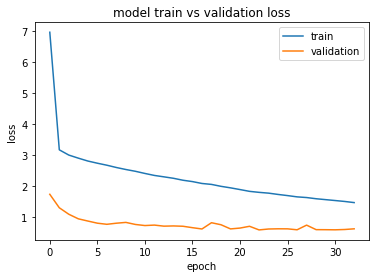

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 64)                491776    
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 491,841
Trainable params: 491,841
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#X_test=X_test.values
X_test=X_test.astype('float32')
X_test=scaler.transform(X_test)

In [ ]:
X_test.shape

(6683, 1856)

In [ ]:
X_test= np.reshape(X_test,(X_test.shape[0],1,X_test.shape[1]))

In [ ]:
X_test.shape

(6683, 1, 1856)

In [ ]:
Prediction = model.predict(X_test)
Prediction

array([[39.956337],
       [27.486525],
       [12.351695],
       ...,
       [32.197685],
       [20.025951],
       [15.910713]], dtype=float32)

In [ ]:
testScore = math.sqrt(mean_squared_error(y_fortest, Prediction))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 0.86 RMSE


In [ ]:
y_fortest

0       40.0
1       28.0
2       12.0
3       35.0
4       28.8
        ... 
6678    39.0
6679    10.0
6680    30.6
6681    20.0
6682    16.0
Name: Milk, Length: 6683, dtype: float64

In [ ]:
from numpy import ndarray
import numpy as np
compare=np.zeros(5,int)
#0-2,3-5,6-8,9-11,11以上
#print(compare[0])
#print(compare[1])
#print(compare[2])
#print(compare[3])
#print(compare[4])

In [ ]:
y=0
for i in range(6683):
  temp=y_fortest[i]-Prediction[i]
  num=abs(temp)
  if num>0 and num<=2:
    compare[0]=compare[0]+1
  elif num>2 and num <=5:
    compare[1]=compare[1]+1
  elif num>5 and num <=8:
    compare[2]=compare[2]+1
  elif num>8 and num <=11:
    compare[3]=compare[3]+1
  elif num>11:
    compare[4]=compare[4]+1

In [ ]:
print(compare[0],compare[1],compare[2],compare[3],compare[4])

6534 117 24 3 5


<BarContainer object of 5 artists>

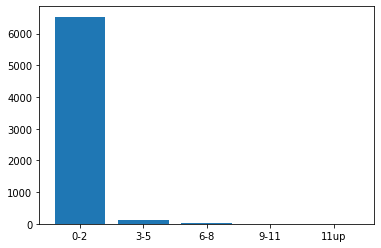

In [ ]:
import matplotlib.pyplot as plt
x_ray=['0-2','3-5','6-8','9-11','11up']
plt.bar(x_ray, compare, label = 'compare')


<BarContainer object of 5 artists>


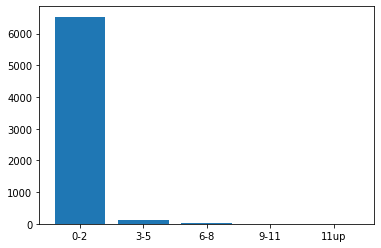

In [ ]:
print(plt.bar(x_ray, compare, label = 'compare'))

In [ ]:
from numpy import ndarray
import numpy as np
compare0=np.zeros(5,int)
y=0
for i in range(6683):
  temp=y_fortest[i]-Prediction[i]
  num=abs(temp)
  if num>0 and num<=1:
    compare0[0]=compare0[0]+1
  elif num>1 and num <=2:
    compare0[1]=compare0[1]+1
  elif num>2 and num <=4:
    compare0[2]=compare0[2]+1
  elif num>4 and num <=8:
    compare0[3]=compare0[3]+1
  elif num>8:
    compare0[4]=compare0[4]+1

In [ ]:
print(compare0[0],compare0[1],compare0[2],compare0[3],compare[4])

12733 452 116 52 13


<BarContainer object of 5 artists>

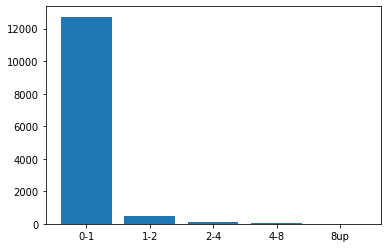

In [ ]:
import matplotlib.pyplot as plt
x_ray=['0-1','1-2','2-4','4-8','8up']
plt.bar(x_ray, compare, label = 'compare')

In [ ]:
import pandas as pd
#字典中的key值即為csv中列名
dataframe = pd.DataFrame({'y_true':list(y_fortest),'prediction':list(Prediction)})
#dataframe = pd.DataFrame({'prediction':data})
#將DataFrame儲存為csv,index表示是否顯示行名，default=True
dataframe.to_csv("testPrediction.csv",index=False,sep=',')

In [ ]:
from keras.models import load_model

model.save('0902_4.88.h5')  # creates a HDF5 file 'model.h5'